<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [3]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 164.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 183.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 128.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 144.4 MB/s eta 0:00:00


Import pandas module


In [5]:
import pandas as pd


Import matplotlib


In [6]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [7]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [8]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [17]:
# Window 1: Load Dataset and Initial Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset columns:", df.columns.tolist()[:10])  # Show first 10 columns

# Window 2: Task 1 - Identify Duplicate Rows
print("="*60)
print("TASK 1: IDENTIFY DUPLICATE ROWS")
print("="*60)

# Check for complete duplicates
complete_duplicates = df.duplicated().sum()
print(f"Complete duplicate rows (all columns identical): {complete_duplicates}")

# Check data quality for potential key columns
key_columns = ['MainBranch', 'Employment', 'Country', 'EdLevel', 'YearsCode', 'YearsCodePro']
available_cols = [col for col in key_columns if col in df.columns]

print(f"\nAvailable key columns: {available_cols}")

# Check for duplicates using a subset of reliable columns
subset_cols = ['MainBranch', 'Employment', 'Country']
subset_cols = [col for col in subset_cols if col in df.columns]

print(f"Using subset for duplicate detection: {subset_cols}")

subset_duplicates = df.duplicated(subset=subset_cols, keep=False).sum()
print(f"Potential duplicates based on subset: {subset_duplicates}")

if subset_duplicates > 0:
    duplicate_rows = df[df.duplicated(subset=subset_cols, keep=False)]
    print(f"\nSample of duplicate rows:")
    print(duplicate_rows[subset_cols].head(5))
else:
    print("No duplicates found based on selected criteria")

Dataset shape: (65457, 114)

First 5 rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                              

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [13]:
# Analyze duplicates based on selected columns
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
subset_duplicates = df.duplicated(subset=subset_columns, keep=False).sum()
print(f"Duplicate rows based on {subset_columns}: {subset_duplicates}")

# Analyze which columns frequently contain identical values in duplicates
duplicate_analysis = duplicate_rows.nunique() / len(duplicate_rows) * 100
print("\nPercentage of unique values in duplicate rows for each column:")
for col, pct in duplicate_analysis.items():
    if pct < 100:  # Only show columns with some duplicates
        print(f"{col}: {pct:.1f}% unique")

# Show most common values in duplicate rows for key columns
print("\nMost common values in duplicate rows:")
key_columns = ['Country', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType']
for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(duplicate_rows[col].value_counts().head(5))

Duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65290

Percentage of unique values in duplicate rows for each column:
ResponseId: 50.0% unique
MainBranch: 10.0% unique
Age: 15.0% unique
Employment: 20.0% unique
RemoteWork: 7.5% unique
Check: 2.5% unique
CodingActivities: 22.5% unique
EdLevel: 15.0% unique
LearnCode: 42.5% unique
LearnCodeOnline: 35.0% unique
TechDoc: 15.0% unique
YearsCode: 35.0% unique
YearsCodePro: 27.5% unique
DevType: 22.5% unique
OrgSize: 12.5% unique
PurchaseInfluence: 7.5% unique
BuyNewTool: 15.0% unique
BuildvsBuy: 7.5% unique
TechEndorse: 17.5% unique
Country: 30.0% unique
Currency: 17.5% unique
CompTotal: 10.0% unique
LanguageHaveWorkedWith: 42.5% unique
LanguageWantToWorkWith: 40.0% unique
LanguageAdmired: 37.5% unique
DatabaseHaveWorkedWith: 37.5% unique
DatabaseWantToWorkWith: 32.5% unique
DatabaseAdmired: 32.5% unique
PlatformHaveWorkedWith: 27.5% unique
PlatformWantToWorkWith: 25.0% unique
PlatformAdmired: 22.5% unique
WebframeHaveWor

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


TASK 3: VISUALIZE DUPLICATES DISTRIBUTION


/tmp/ipykernel_299/2144984012.py:55: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


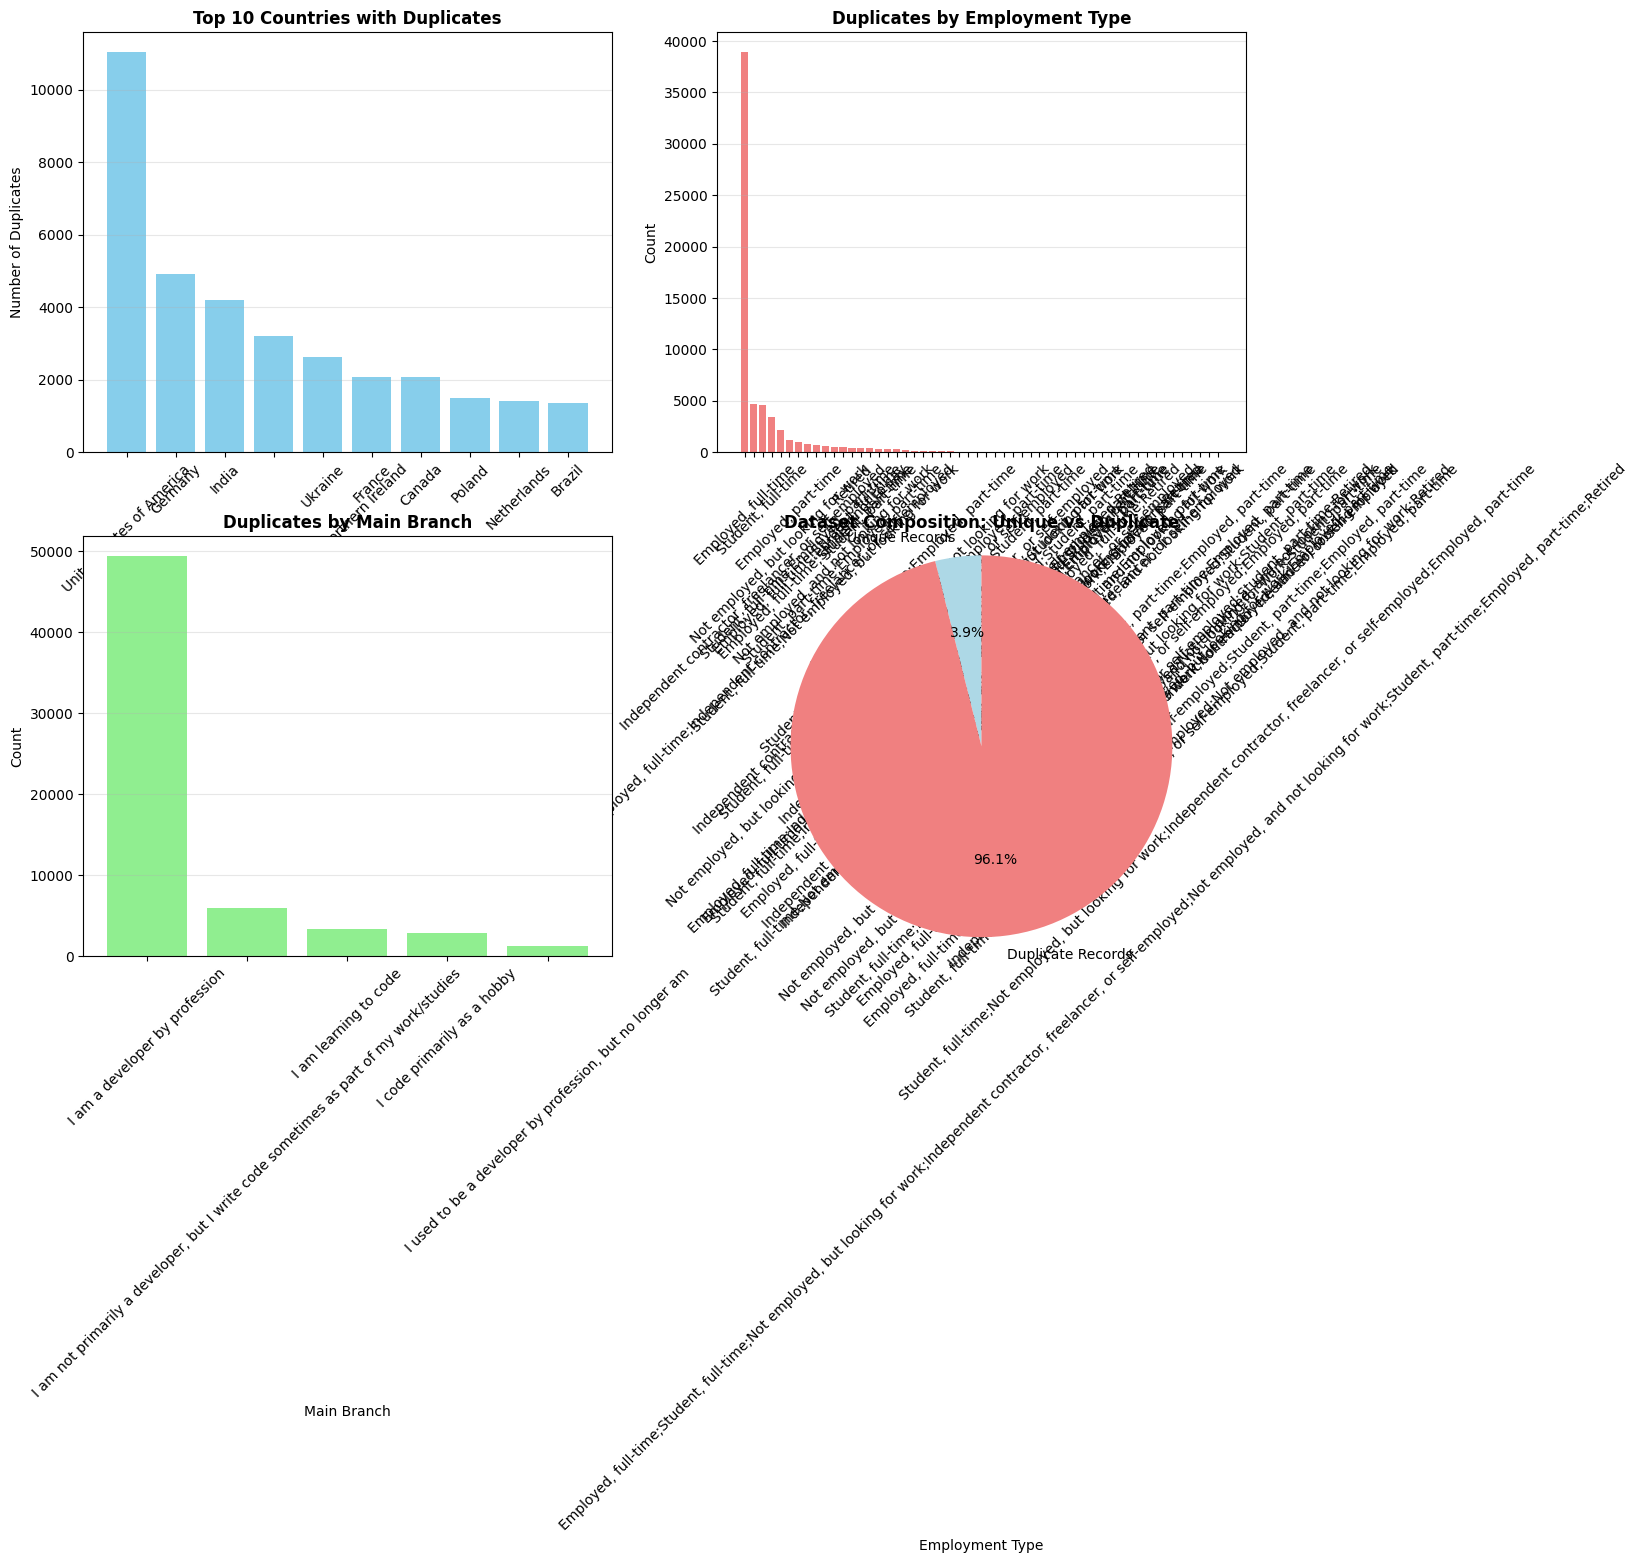

In [23]:
# Window 4: Task 3 - Visualize Duplicates Distribution
print("="*60)
print("TASK 3: VISUALIZE DUPLICATES DISTRIBUTION")
print("="*60)

plt.figure(figsize=(15, 12))

if subset_duplicates > 0:
    # Plot 1: Duplicates by Country (Top 10)
    plt.subplot(2, 2, 1)
    country_counts = duplicate_rows['Country'].value_counts().head(10)
    plt.bar(range(len(country_counts)), country_counts.values, color='skyblue')
    plt.title('Top 10 Countries with Duplicates', fontweight='bold')
    plt.xlabel('Country')
    plt.ylabel('Number of Duplicates')
    plt.xticks(range(len(country_counts)), country_counts.index, rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 2: Duplicates by Employment Type
    plt.subplot(2, 2, 2)
    employment_counts = duplicate_rows['Employment'].value_counts()
    plt.bar(range(len(employment_counts)), employment_counts.values, color='lightcoral')
    plt.title('Duplicates by Employment Type', fontweight='bold')
    plt.xlabel('Employment Type')
    plt.ylabel('Count')
    plt.xticks(range(len(employment_counts)), employment_counts.index, rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 3: Duplicates by Main Branch
    plt.subplot(2, 2, 3)
    mainbranch_counts = duplicate_rows['MainBranch'].value_counts()
    plt.bar(range(len(mainbranch_counts)), mainbranch_counts.values, color='lightgreen')
    plt.title('Duplicates by Main Branch', fontweight='bold')
    plt.xlabel('Main Branch')
    plt.ylabel('Count')
    plt.xticks(range(len(mainbranch_counts)), mainbranch_counts.index, rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 4: Duplicate vs Unique Distribution
    plt.subplot(2, 2, 4)
    labels = ['Unique Records', 'Duplicate Records']
    sizes = [len(df) - subset_duplicates, subset_duplicates]
    colors = ['lightblue', 'lightcoral']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Dataset Composition: Unique vs Duplicate', fontweight='bold')
    plt.axis('equal')

else:
    for i in range(1, 5):
        plt.subplot(2, 2, i)
        plt.text(0.5, 0.5, 'No duplicates found', 
                ha='center', va='center', fontsize=14, fontweight='bold')
        plt.title(f'Plot {i}')

plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [22]:
# Window 5: Task 4 - Strategic Removal of Duplicates
print("="*60)
print("TASK 4: STRATEGIC REMOVAL OF DUPLICATES")
print("="*60)

# Define columns for uniqueness
uniqueness_cols = ['MainBranch', 'Employment', 'Country']
uniqueness_cols = [col for col in uniqueness_cols if col in df.columns]

print(f"Using columns for uniqueness: {uniqueness_cols}")

# Check duplicates based on these columns
duplicates_to_remove = df.duplicated(subset=uniqueness_cols, keep=False).sum()
print(f"Records identified as duplicates: {duplicates_to_remove}")

if duplicates_to_remove > 0:
    print(f"\nOriginal dataset shape: {df.shape}")
    
    # Remove duplicates (keep first occurrence)
    df_cleaned = df.drop_duplicates(subset=uniqueness_cols, keep='first')
    
    print(f"Cleaned dataset shape: {df_cleaned.shape}")
    print(f"Rows removed: {len(df) - len(df_cleaned)}")
    
    # Verify removal
    remaining_duplicates = df_cleaned.duplicated(subset=uniqueness_cols).sum()
    print(f"Remaining duplicates after cleaning: {remaining_duplicates}")
    
    # Save cleaned dataset
    df_cleaned.to_csv('cleaned_survey_data.csv', index=False)
    print("Cleaned dataset saved as 'cleaned_survey_data.csv'")
    
    # Show sample of cleaned data
    print("\nSample of cleaned data:")
    print(df_cleaned.head(3))
else:
    print("No duplicates found based on selected criteria")
    df_cleaned = df.copy()

TASK 4: STRATEGIC REMOVAL OF DUPLICATES
Using columns for uniqueness: ['MainBranch', 'Employment', 'Country']
Records identified as duplicates: 62903

Original dataset shape: (65457, 114)
Cleaned dataset shape: (5118, 114)
Rows removed: 60339
Remaining duplicates after cleaning: 0
Cleaned dataset saved as 'cleaned_survey_data.csv'

Sample of cleaned data:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
3           4           I am learning to code     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
3               

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
